# Analyzing Causes of Death in US and the Household Income Ranges in Tempe, US using Spatial Data


In [321]:
# import required packages
import pandas as pd
# packages for visulising data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as lines

## First Dataset

In [308]:
# Data downloaded from https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states
death = pd.read_csv("D:/sem2/Sem2/Programming_for_gis/100/Leading_Causes_of_Death__USA.csv")

#### Summary of the Data

In [3]:
death.head(20)

,Year,Cause Name,State,Deaths,Age_adjusted_death_rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8
5,2017,Unintentional injuries,California,13840,33.2
6,2017,Unintentional injuries,Colorado,3037,53.6
7,2017,Unintentional injuries,Connecticut,2078,53.2
8,2017,Unintentional injuries,Delaware,608,61.9
9,2017,Unintentional injuries,District of Columbia,427,61.0


In [4]:
death.tail(20)

,Year,Cause Name,State,Deaths,Age_adjusted_death_rate
10848,1999,Kidney disease,New York,2302,12.0
10849,1999,Kidney disease,North Carolina,1138,15.4
10850,1999,Kidney disease,North Dakota,85,10.5
10851,1999,Kidney disease,Ohio,1748,15.0
10852,1999,Kidney disease,Oklahoma,425,11.9
10853,1999,Kidney disease,Oregon,260,7.3
10854,1999,Kidney disease,Pennsylvania,2680,18.0
10855,1999,Kidney disease,Rhode Island,111,9.0
10856,1999,Kidney disease,South Carolina,434,11.8
10857,1999,Kidney disease,South Dakota,97,10.8


In [5]:
death.columns

Index(['Year', 'Cause Name', 'State', 'Deaths', 'Age_adjusted_death_rate'], dtype='object')

In [6]:
death.describe()

,Year,Deaths,Age_adjusted_death_rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [7]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   Cause Name               10868 non-null  object 
 2   State                    10868 non-null  object 
 3   Deaths                   10868 non-null  int64  
 4   Age_adjusted_death_rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 424.7+ KB


In [8]:
death.shape

(10868, 5)

In [9]:
death.isnull().sum()

Year                       0
Cause Name                 0
State                      0
Deaths                     0
Age_adjusted_death_rate    0
dtype: int64

In [10]:
death.isna()

,Year,Cause Name,State,Deaths,Age_adjusted_death_rate
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
10863,False,False,False,False,False
10864,False,False,False,False,False
10865,False,False,False,False,False
10866,False,False,False,False,False


### Data Cleaning

In [309]:
# updating the column names. All the words to be changed to lower case.
cols1 = ["year","cause_name","state", "deaths", "adjusted_death_rate"]
death = pd.read_csv("D:/sem2/Sem2/Programming_for_gis/100/Leading_Causes_of_Death__USA.csv", header=None, skiprows=1, names=cols1)
death.columns

Index(['year', 'cause_name', 'state', 'deaths', 'adjusted_death_rate'], dtype='object')

In [12]:
death['year'].unique()

array([2017, 2007, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

In [13]:
death['cause_name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [14]:
death['state'].value_counts()

state
United States           209
Alabama                 209
Nebraska                209
Nevada                  209
New Hampshire           209
New Jersey              209
New Mexico              209
New York                209
North Carolina          209
North Dakota            209
Ohio                    209
Oklahoma                209
Oregon                  209
Pennsylvania            209
Rhode Island            209
South Carolina          209
South Dakota            209
Tennessee               209
Texas                   209
Utah                    209
Vermont                 209
Virginia                209
Washington              209
West Virginia           209
Wisconsin               209
Montana                 209
Missouri                209
Mississippi             209
Hawaii                  209
Alaska                  209
Arizona                 209
Arkansas                209
California              209
Colorado                209
Connecticut             209
Delaware      

In [15]:
death['deaths'].value_counts()

deaths
343      15
265      12
86       11
189      11
308      11
         ..
40919     1
15773     1
24987     1
13372     1
35525     1
Name: count, Length: 5964, dtype: int64

In [310]:
# dropping united states row as it is a accumulation of all the states in each years
death = death[death['state'] != 'United States']

In [311]:
import warnings
warnings.filterwarnings('ignore')

### Data Visualization

In [312]:
death_x=death.loc[(death['cause_name'].isin(['Influenza and pneumonia', 'Heart disease', 'Cancer', 'Diabetes', 'Stroke'])) & (death['year'] == 2017)]
death_x

,year,cause_name,state,deaths,adjusted_death_rate
157,2017,Stroke,Alabama,2931,50.0
158,2017,Stroke,Alaska,190,35.1
159,2017,Stroke,Arizona,2681,30.8
160,2017,Stroke,Arkansas,1612,43.8
161,2017,Stroke,California,16355,37.6
...,...,...,...,...,...
516,2017,Cancer,Virginia,15064,152.6
517,2017,Cancer,Washington,12664,148.4
518,2017,Cancer,West Virginia,4654,179.4
519,2017,Cancer,Wisconsin,11318,153.2


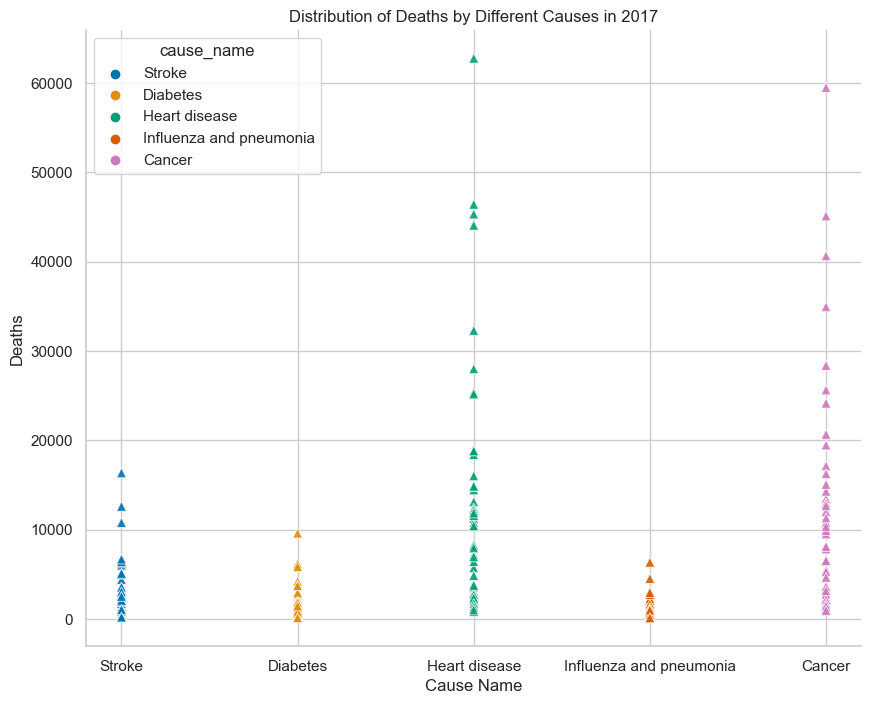

In [313]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.scatterplot(data=death_x,
                x='cause_name',
                y='deaths',
                hue='cause_name',
                s=50,
                marker='^',
                alpha=0.9,
                palette="colorblind"
               );
# Set the title and axis labels
plt.xlabel('Cause Name')
plt.ylabel('Deaths')
plt.title('Distribution of Deaths by Different Causes in 2017')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


In [314]:
death_y=death.loc[(death['cause_name'].isin(['Influenza and pneumonia', 'Heart disease', 'Cancer', 'Diabetes', 'Stroke'])) & (death['year'] == 2007)]
death_y

,year,cause_name,state,deaths,adjusted_death_rate
5876,2007,Stroke,Alabama,2747,56.9
5877,2007,Stroke,Alaska,157,47.0
5878,2007,Stroke,Arizona,2207,35.9
5879,2007,Stroke,Arkansas,1873,60.1
5880,2007,Stroke,California,14557,43.7
...,...,...,...,...,...
6235,2007,Cancer,Virginia,14009,184.0
6236,2007,Cancer,Washington,11568,179.0
6237,2007,Cancer,West Virginia,4690,204.3
6238,2007,Cancer,Wisconsin,10963,177.2


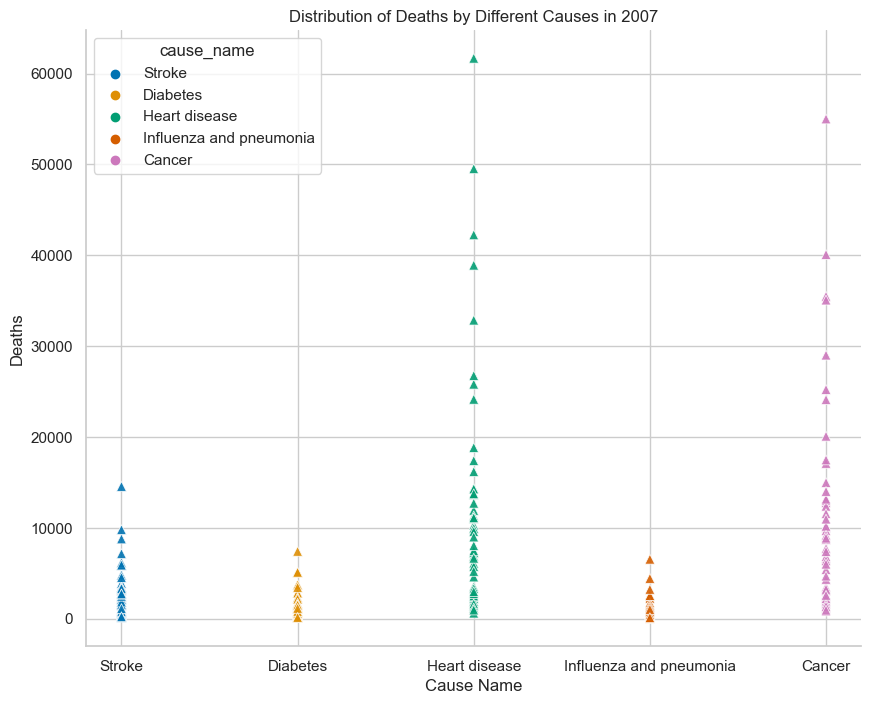

In [315]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.scatterplot(data=death_y,
                x='cause_name',
                y='deaths',
                hue='cause_name',
                s=50,
                marker='^',
                alpha=0.9,
                palette="colorblind"
               );
# Set the title and axis labels
plt.xlabel('Cause Name')
plt.ylabel('Deaths')
plt.title('Distribution of Deaths by Different Causes in 2007')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


In [44]:
death_z=death.loc[(death['cause_name'].isin(['Influenza and pneumonia', 'Heart disease', 'Cancer', 'Diabetes', 'Stroke']))& (death['year'].between(2007, 2017, inclusive='both'))]
death_z

,year,cause_name,state,deaths,adjusted_death_rate
157,2017,Stroke,Alabama,2931,50.0
158,2017,Stroke,Alaska,190,35.1
159,2017,Stroke,Arizona,2681,30.8
160,2017,Stroke,Arkansas,1612,43.8
161,2017,Stroke,California,16355,37.6
...,...,...,...,...,...
6235,2007,Cancer,Virginia,14009,184.0
6236,2007,Cancer,Washington,11568,179.0
6237,2007,Cancer,West Virginia,4690,204.3
6238,2007,Cancer,Wisconsin,10963,177.2


In [23]:
# To compare the aggregated values across different causes for the year 2017 in the death_z DataFrame
death_17=death_z[death_z['year'] == 2017].groupby('cause_name')[['deaths']].sum().reset_index()
death_17

,cause_name,deaths
0,Cancer,599108
1,Diabetes,83564
2,Heart disease,647457
3,Influenza and pneumonia,55672
4,Stroke,146383


In [24]:
# To compare the aggregated values across different causes for the year 2007 in the death_z DataFrame
death_07=death_z[death_z['year'] == 2007].groupby('cause_name')[['deaths']].sum().reset_index()
death_07

,cause_name,deaths
0,Cancer,562875
1,Diabetes,71382
2,Heart disease,616067
3,Influenza and pneumonia,52717
4,Stroke,135952


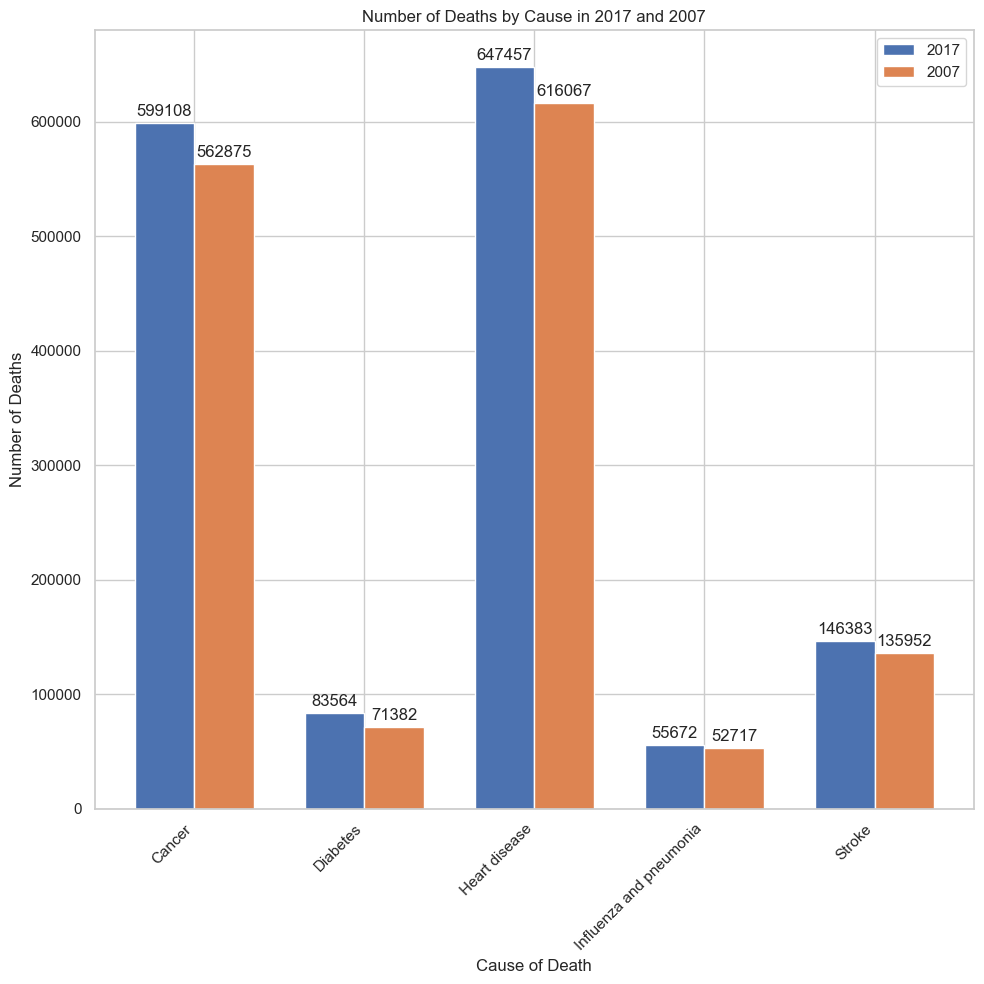

In [34]:
# Assuming death_17 and death_07 are your dataframes as shown in the image
# Merging the two dataframes on cause_name
merged_df = pd.merge(death_17, death_07, on='cause_name', suffixes=('_2017', '_2007'))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 10))

# Setting the positions and width for the bars
bar_width = 0.35
index = merged_df['cause_name']

# Creating bar positions
bar1 = range(len(index))
bar2 = [i + bar_width for i in bar1]

# Plotting the bars
ax.bar(bar1, merged_df['deaths_2017'], width=bar_width, label='2017')
ax.bar(bar2, merged_df['deaths_2007'], width=bar_width, label='2007')

# Adding data labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
add_labels(ax.patches)


# Adding labels and title
ax.set_xlabel('Cause of Death')
ax.set_ylabel('Number of Deaths')
ax.set_title('Number of Deaths by Cause in 2017 and 2007')
ax.set_xticks([r + bar_width / 2 for r in range(len(index))])
ax.set_xticklabels(index, rotation=45, ha='right')

# Adding legend
ax.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

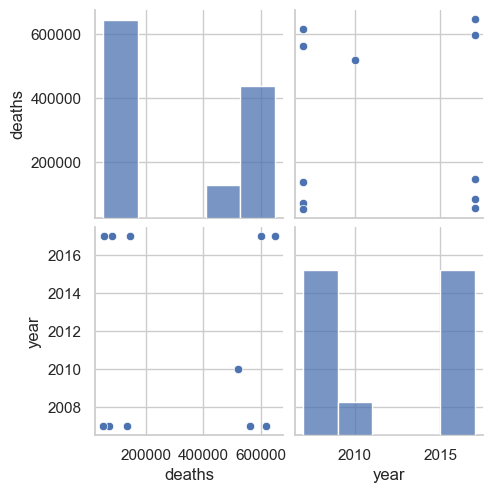

In [302]:
sns.pairplot(death_z);

### Spearman's rank correlation

In [318]:
# Calculate Spearman's rank correlation
death_corr =death[['year', 'deaths', 'adjusted_death_rate']].corr(method = 'spearman')
death_corr

,year,deaths,adjusted_death_rate
year,1.000000,0.040329,-0.048792
deaths,0.040329,1.000000,0.716613
adjusted_death_rate,-0.048792,0.716613,1.000000


Labels: Index(['year', 'deaths', 'adjusted death rate'], dtype='object') Index(['year', 'deaths', 'adjusted death rate'], dtype='object')
Labels with capital letters: ['Year', 'Deaths', 'Adjusted death rate'] ['Year', 'Deaths', 'Adjusted death rate']


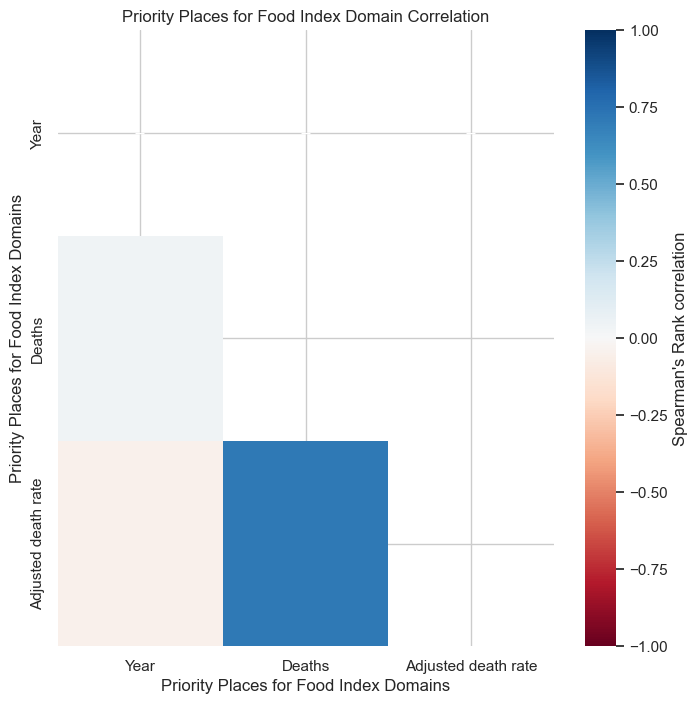

In [319]:
# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(death_corr))

# define axis tick labels
# get the index and the columns, replace the underscores with spaces and remove 'domain ' from the name
x_axis_labels = death_corr.columns.str.replace('_',' ').str.replace('domain ','')
y_axis_labels = death_corr.index.str.replace('_',' ').str.replace('domain ','')

# Have a look at what the tick labels look like
print('Labels:',x_axis_labels ,y_axis_labels)

# If we want to capitalize each tick label
# for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(death_corr, 
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True, 
            # define colourmap
            cmap='RdBu', 
            # define value of minimum colour on cbar
            vmin=-1, 
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask, 
            # use the custom tick labels
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Priority Places for Food Index Domains", 
       ylabel="Priority Places for Food Index Domains",
      title ='Priority Places for Food Index Domain Correlation' );
plt.savefig('Priority_Places_for_Food_Index_Domain_Correlation.png')

In [84]:
death_z=death.loc[(death['cause_name'].isin(['Influenza and pneumonia', 'Heart disease', 'Cancer', 'Diabetes', 'Stroke']))& (death['year'].between(2007, 2017, inclusive='both'))]
death_z

,year,cause_name,state,deaths,adjusted_death_rate
157,2017,Stroke,Alabama,2931,50.0
158,2017,Stroke,Alaska,190,35.1
159,2017,Stroke,Arizona,2681,30.8
160,2017,Stroke,Arkansas,1612,43.8
161,2017,Stroke,California,16355,37.6
...,...,...,...,...,...
6235,2007,Cancer,Virginia,14009,184.0
6236,2007,Cancer,Washington,11568,179.0
6237,2007,Cancer,West Virginia,4690,204.3
6238,2007,Cancer,Wisconsin,10963,177.2


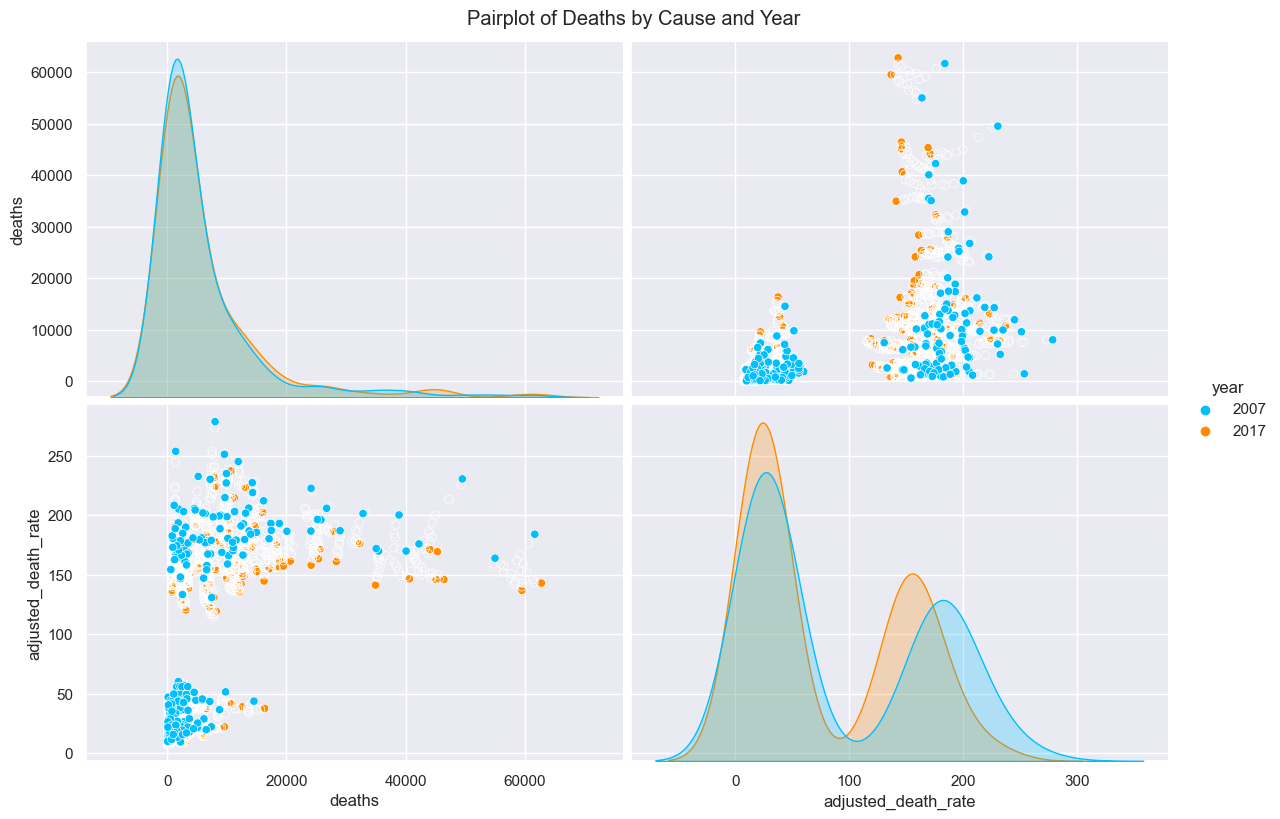

In [85]:
# Set the style of plot grid
sns.set(style="darkgrid")

# Set the order of hue categories
hue_order = [2007, 2017]

# Pairplot with customized colour palette and increased size
sns.pairplot(death_z, hue='year', hue_order=hue_order, palette=['deepskyblue', 'darkorange'], height=4, aspect=1.5)

# Adjust the title or other layout aspects if necessary
plt.suptitle('Pairplot of Deaths by Cause and Year', y=1.02)

# Show the plot
plt.show()

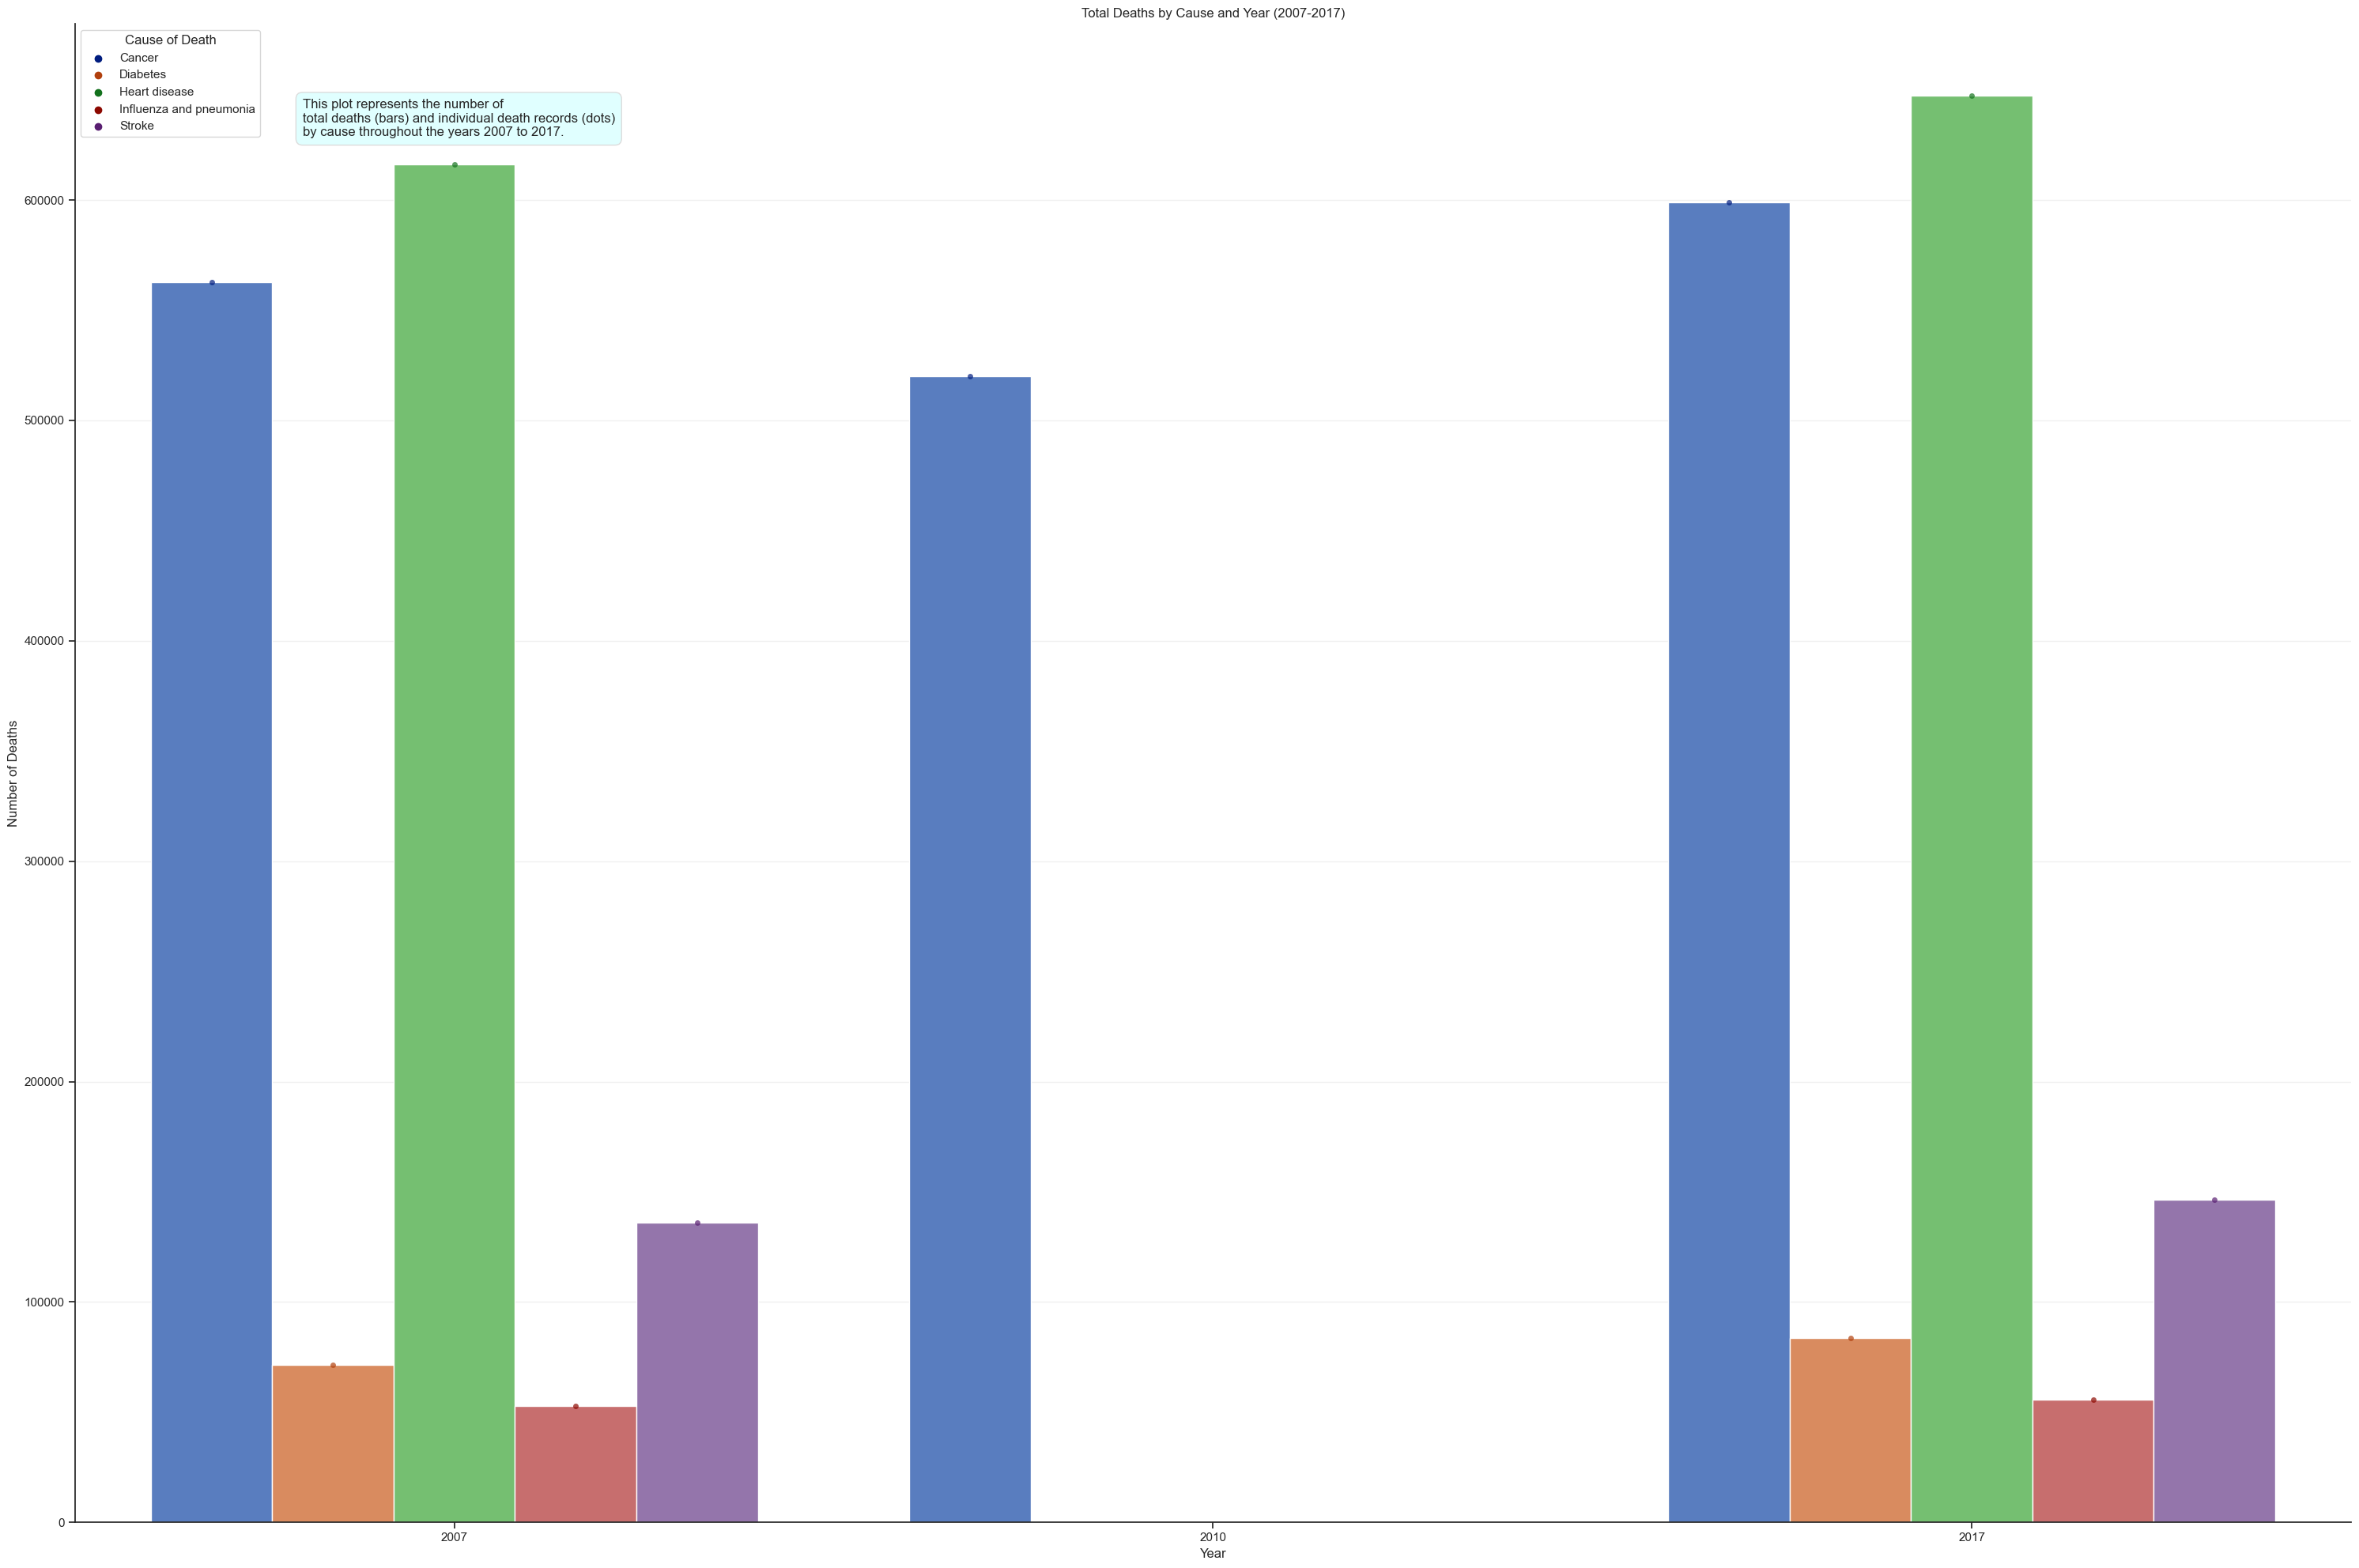

In [100]:
# Create a new figure with a specific size
plt.figure(figsize=(30, 20))

# Set the style of plot grid
sns.set(style="ticks")

# Add grid lines to the plot
plt.grid(True, axis='y', alpha=0.3)

# Create the bar plot
sns.barplot(data=death_z, x='year', y='deaths', hue='cause_name', palette='muted', ci=None)

# Create the strip plot
sns.stripplot(data=death_z, x='year', y='deaths', hue='cause_name', dodge=True, palette='dark', alpha=0.7, marker='o', size=5)

# Custom axis labels and set title
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Cause and Year (2007-2017)')

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:5], labels[:5], title='Cause of Death', loc='upper left')

# Additional description box
description = "This plot represents the number of \n"
description += "total deaths (bars) and individual death records (dots)"
description += "\n"
description += "by cause throughout the years 2007 to 2017."

plt.text(0.1, 0.95, description, transform=plt.gca().transAxes, fontsize=12, va='top', ha='left', 
         bbox=dict(facecolor='lightcyan', edgecolor='gainsboro', boxstyle='round,pad=0.5'))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

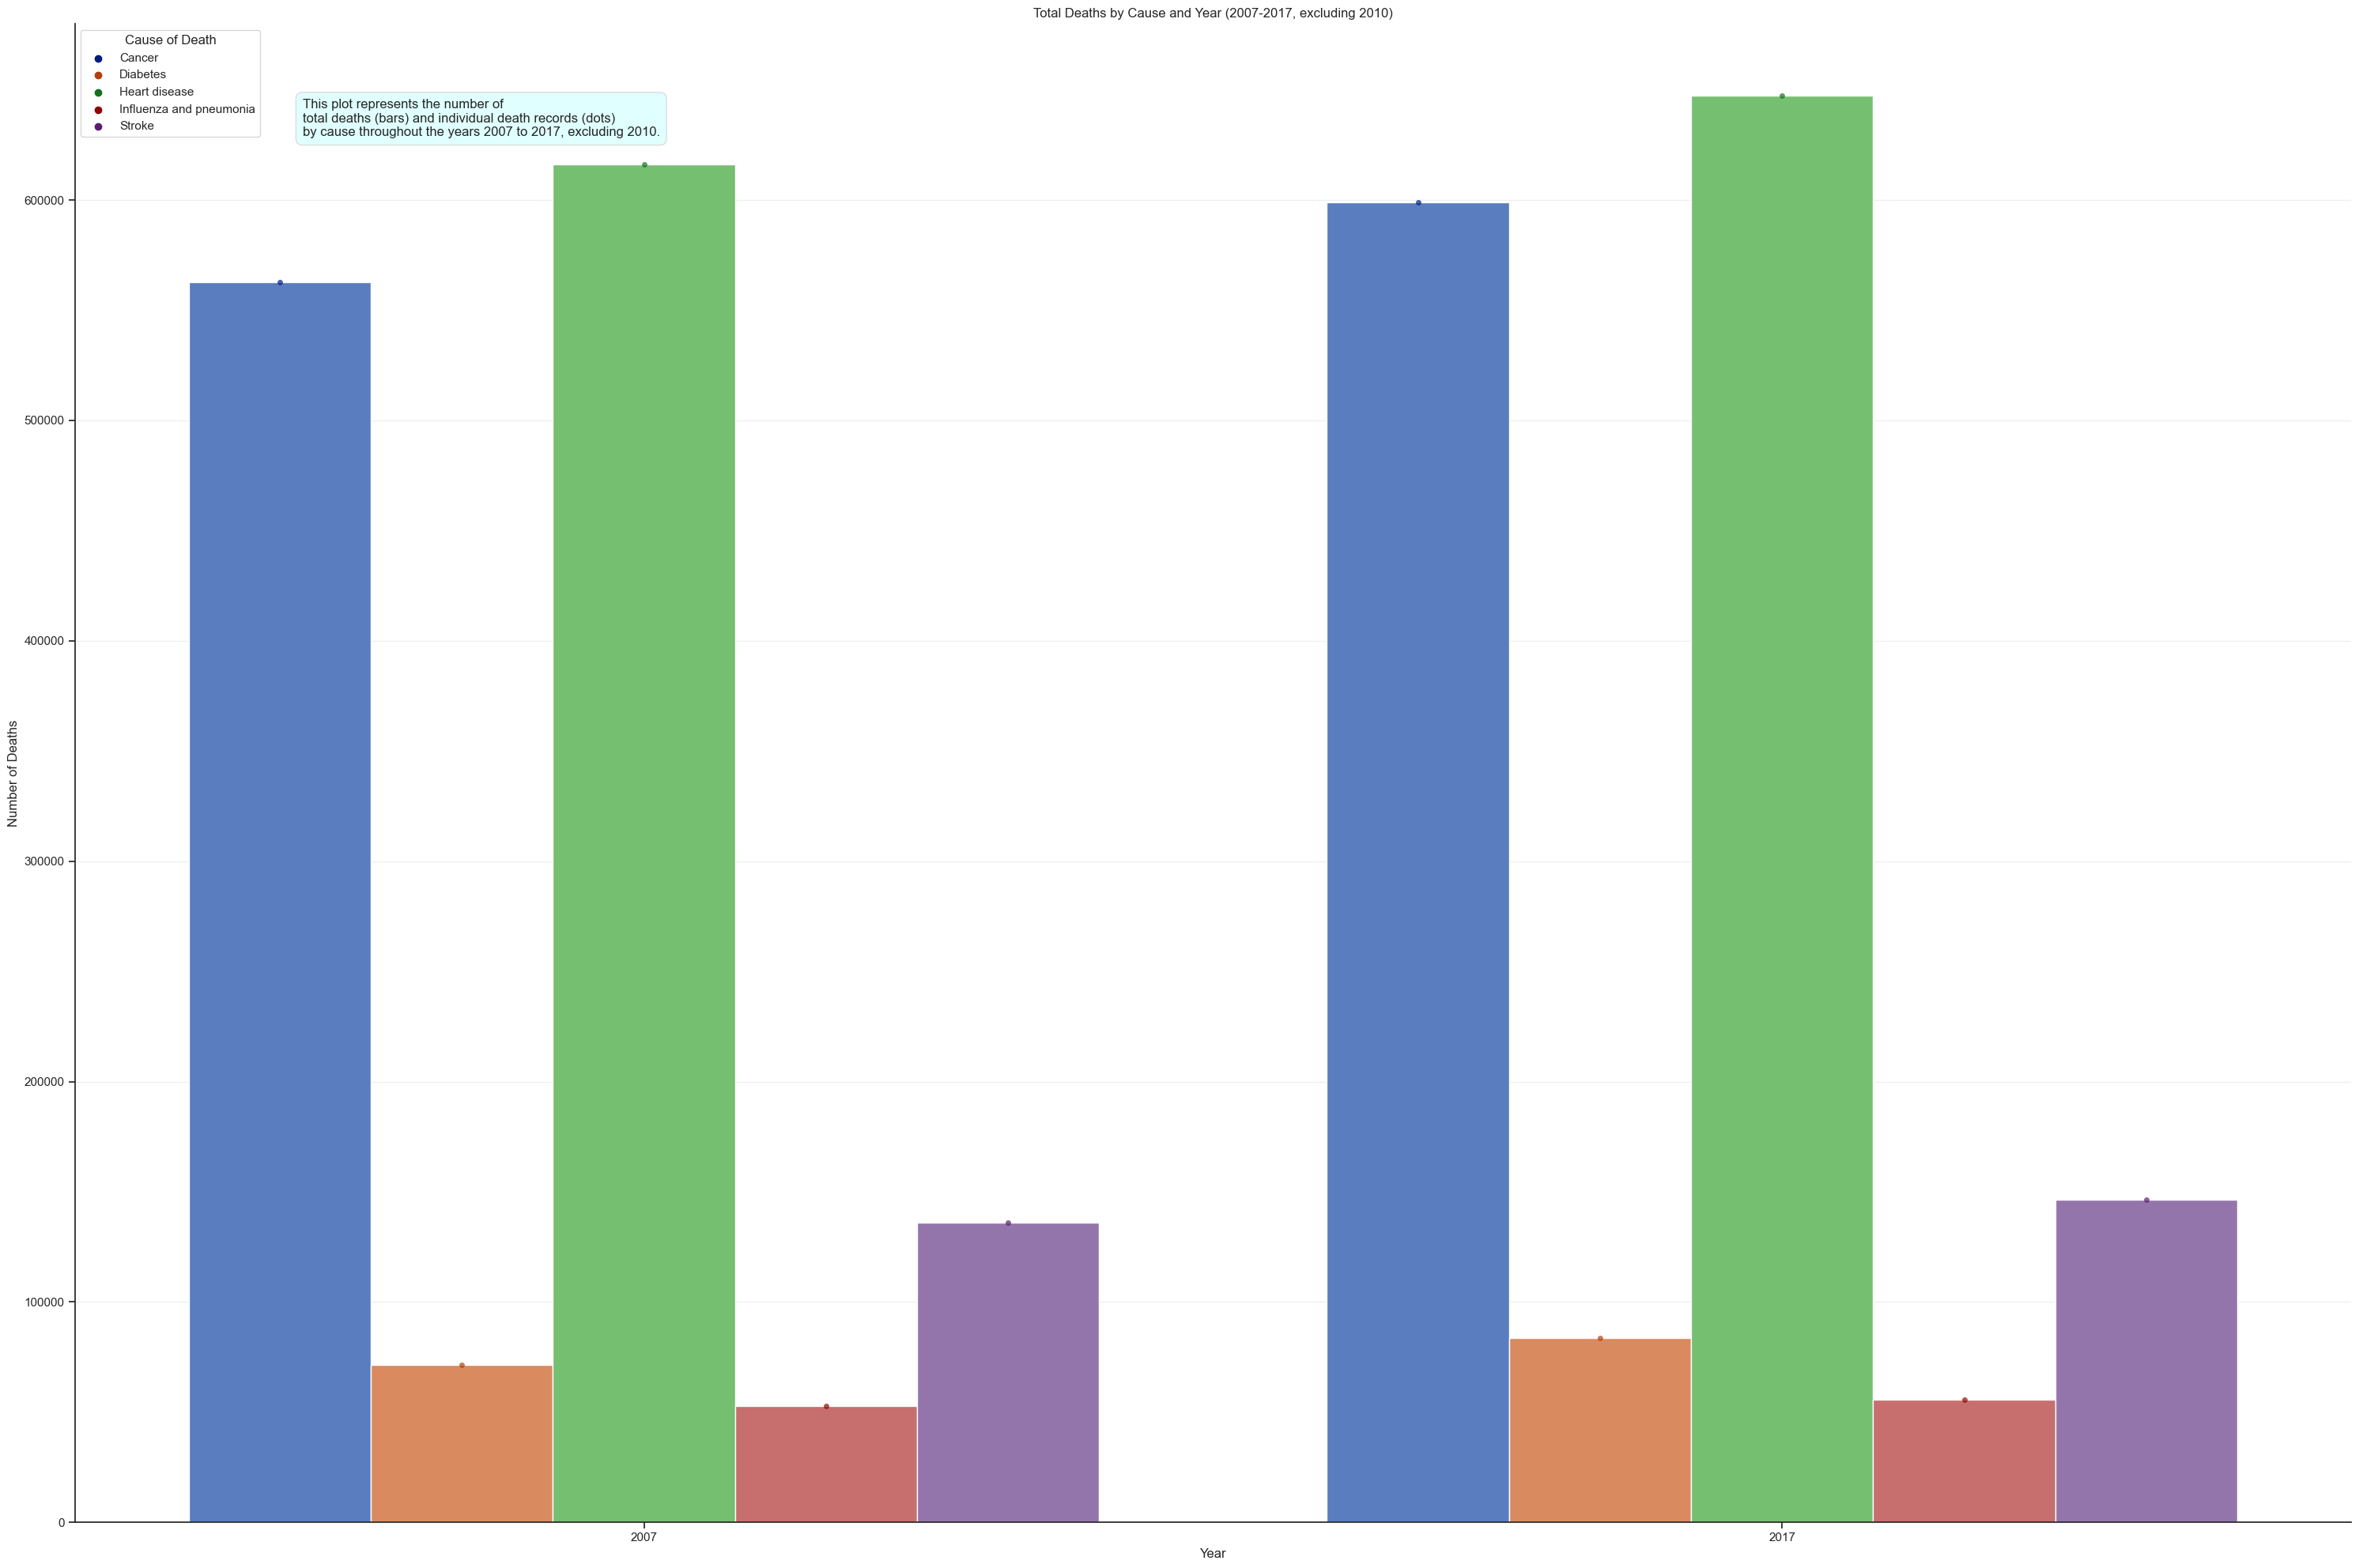

In [103]:
# Filter the dataset to exclude the year 2010
death_z_filtered = death_z[death_z['year'] != 2010]

# Create a new figure with a specific size
plt.figure(figsize=(30, 20))

# Set the style of plot grid
sns.set(style="ticks")

# Add grid lines to the plot
plt.grid(True, axis='y', alpha=0.3)

# Create the bar plot
sns.barplot(data=death_z_filtered, x='year', y='deaths', hue='cause_name', palette='muted', ci=None)

# Create the strip plot
sns.stripplot(data=death_z_filtered, x='year', y='deaths', hue='cause_name', dodge=True, palette='dark', alpha=0.7, marker='o', size=5)

# Custom axis labels and set title
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Cause and Year (2007-2017, excluding 2010)')

# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:5], labels[:5], title='Cause of Death', loc='upper left')

# Additional description box
description = "This plot represents the number of \n"
description += "total deaths (bars) and individual death records (dots)"
description += "\n"
description += "by cause throughout the years 2007 to 2017, excluding 2010."

plt.text(0.1, 0.95, description, transform=plt.gca().transAxes, fontsize=12, va='top', ha='left', 
         bbox=dict(facecolor='lightcyan', edgecolor='gainsboro', boxstyle='round,pad=0.5'))

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


----

## For Second Dataset

In [107]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs

In [320]:
#Read in the spatial dataframe
# Data downloaded from: https://catalog.data.gov/dataset/income-acs-2018-2022-tempe-tracts
income =gpd.read_file("D:/sem2/Sem2/Programming_for_gis/100/Income.geojson")

#### Data Summary

In [184]:
#look at the pav geopandas dataframe 
income.head()

,OBJECTID,NAMELSAD,City,Households_Total,Households_Total_Less_than__10K,Households_Total__10K_to__14K,Households_Total_15K_to_24K,Households_Total__25k_to__34k,Households_Total_35K_to_49K,Households_Total_50K_to_74k,...,Nonfamily_households_Total__50_,Nonfamily_households_Total__75_,Nonfamily_households_Total__100,Nonfamily_households_Total__150,Nonfamily_households_Total__200,Nonfamily_households_Median,Nonfamily_households_Mean,Shape__Area,Shape__Length,geometry
0,1,Census Tract 8100,Tempe,1342,0.7,2.0,2.6,4.8,5.3,10.4,...,18.6,12.3,30.5,8.8,11.2,105156.0,103920.0,3.994232e+06,10200.022258,"POLYGON ((-111.97274 33.32737, -111.97274 33.3..."
1,2,Census Tract 8101,Tempe,2177,0.0,0.0,2.2,1.0,2.3,3.5,...,3.3,15.4,28.2,13.1,17.8,105313.0,150574.0,7.406314e+06,15302.752889,"POLYGON ((-111.94576 33.32652, -111.94580 33.3..."
2,3,Census Tract 8103,Chandler,2556,3.4,1.7,5.0,0.2,11.1,15.9,...,29.3,20.8,12.8,6.1,0.0,66639.0,70599.0,3.682747e+06,7734.496774,"POLYGON ((-111.89421 33.32126, -111.89412 33.3..."
3,4,Census Tract 8104,Chandler,2157,4.2,0.8,3.2,3.9,12.4,11.7,...,21.9,15.2,11.4,9.9,3.0,55698.0,86053.0,7.797834e+06,13680.433150,"POLYGON ((-111.97242 33.30894, -111.97239 33.3..."
4,5,Census Tract 8105,Chandler,2026,1.2,4.7,3.5,8.5,5.8,12.7,...,34.1,2.0,25.2,2.6,2.6,67612.0,74331.0,4.209375e+06,8693.956240,"POLYGON ((-111.94571 33.30607, -111.94569 33.3..."


In [164]:
income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OBJECTID                         73 non-null     int64   
 1   NAMELSAD                         73 non-null     object  
 2   City                             73 non-null     object  
 3   Households_Total                 73 non-null     int64   
 4   Households_Total_Less_than__10K  69 non-null     float64 
 5   Households_Total__10K_to__14K    69 non-null     float64 
 6   Households_Total_15K_to_24K      69 non-null     float64 
 7   Households_Total__25k_to__34k    69 non-null     float64 
 8   Households_Total_35K_to_49K      69 non-null     float64 
 9   Households_Total_50K_to_74k      69 non-null     float64 
 10  Households_Total_75K_to_99K      69 non-null     float64 
 11  Households_Total_100K_to_150K    69 non-null     float64 
 12  Ho

In [166]:
income.isnull().sum()

OBJECTID                            0
NAMELSAD                            0
City                                0
Households_Total                    0
Households_Total_Less_than__10K     4
Households_Total__10K_to__14K       4
Households_Total_15K_to_24K         4
Households_Total__25k_to__34k       4
Households_Total_35K_to_49K         4
Households_Total_50K_to_74k         4
Households_Total_75K_to_99K         4
Households_Total_100K_to_150K       4
Households_Total_150k_to_199k       4
Households_Total_200K_or_more       4
Households_Median_income__dolla     4
Households_Mean_income__dollars     4
Families_Total                      0
Families_Total_Less_than__10_00     4
Families_Total__10_000_to__14_9     4
Families_Total__15_000_to__24_9     4
Families_Total__25_000_to__34_9     4
Families_Total__35_000_to__49_9     4
Families_Total__50_000_to__74_9     4
Families_Total__75_000_to__99_9     4
Families_Total__100_000_to__149     4
Families_Total__150_000_to__199     4
Families_Tot

## Data Cleaning

In [193]:
# dropping the unwanted comlumns to make visualization concise
income_clean = income.drop(['Households_Median_income__dolla', 'Households_Mean_income__dollars', 'Families_Total_Less_than__10_00',     'Families_Total__10_000_to__14_9',    'Families_Total__15_000_to__24_9', 'Families_Total__25_000_to__34_9',    'Families_Total__35_000_to__49_9',  'Families_Total__50_000_to__74_9',    'Families_Total__75_000_to__99_9', 'Families_Total__100_000_to__149',    'Families_Total__150_000_to__199',     'Families_Total__200_000_or_more',    'Families_Median_income__dollars',  'Families_Mean_income__dollars_',       'Marriedcouple_families_Total__1',     'Marriedcouple_families_Total__2',    'Marriedcouple_families_Total__3',   'Marriedcouple_families_Total__4',     'Marriedcouple_families_Total__5',  'Marriedcouple_families_Total__7',     'Marriedcouple_families_Total__6',    'Marriedcouple_families_Total__8',    'Marriedcouple_families_Total__9',    'Marriedcouple_families_Median_i',     'Marriedcouple_families_Mean_inc',  'Nonfamily_households_Total_Less',  'Nonfamily_households_Total__10_',    'Nonfamily_households_Total__15_',   'Nonfamily_households_Total__25_',     'Nonfamily_households_Total__35_',   'Nonfamily_households_Total__50_',    'Nonfamily_households_Total__75_',  'Nonfamily_households_Total__100',     
'Nonfamily_households_Total__150',      'Nonfamily_households_Total__200',     'Nonfamily_households_Median',        'Nonfamily_households_Mean'], axis=1)
print(income_clean.columns)

Index(['OBJECTID', 'NAMELSAD', 'City', 'Households_Total',
       'Households_Total_Less_than__10K', 'Households_Total__10K_to__14K',
       'Households_Total_15K_to_24K', 'Households_Total__25k_to__34k',
       'Households_Total_35K_to_49K', 'Households_Total_50K_to_74k',
       'Households_Total_75K_to_99K', 'Households_Total_100K_to_150K',
       'Households_Total_150k_to_199k', 'Households_Total_200K_or_more',
       'Families_Total', 'Marriedcouple_families_Total',
       'Marriedcouple_families_Total_Le', 'Nonfamily_households_Total',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')


## Data Exploration

In [194]:
income_clean.explore()

## Adding Spatial Dataframe

In [332]:
#Read in the spatial dataframe
# Data downloaded from: https://catalog.data.gov/dataset/character-area-boundary-7f773.
b =gpd.read_file("D:/sem2/Sem2/Programming_for_gis/100/Character_Area_Boundary.geojson")

### Data Summary

In [160]:
b.head()

,OBJECTID,area_number,area_name,square_mileage,acreage,Shape__Area,Shape__Length,geometry
0,1,1,Papago/North Tempe,3.353484,2146.229885,9.344643e+07,58673.589790,"POLYGON ((-111.93809 33.45847, -111.93635 33.4..."
1,2,7,Kiwanis/The Lakes,5.359956,3430.371819,1.494267e+08,55956.572410,"POLYGON ((-111.88187 33.38572, -111.88281 33.3..."
2,3,6,Character Area 6,6.224591,3983.738425,1.730050e+08,85745.097277,"MULTIPOLYGON (((-111.93389 33.35667, -111.9328..."
3,4,8,Corona/South Tempe,6.296696,4029.885266,1.755318e+08,58662.024088,"POLYGON ((-111.89391 33.35671, -111.89385 33.3..."
4,5,4,Apache,2.665150,1705.696141,7.441282e+07,40759.719720,"POLYGON ((-111.90525 33.43676, -111.90511 33.4..."


In [161]:
b.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        8 non-null      int64   
 1   area_number     8 non-null      int64   
 2   area_name       8 non-null      object  
 3   square_mileage  8 non-null      float64 
 4   acreage         8 non-null      float64 
 5   Shape__Area     8 non-null      float64 
 6   Shape__Length   8 non-null      float64 
 7   geometry        8 non-null      geometry
dtypes: float64(4), geometry(1), int64(2), object(1)
memory usage: 644.0+ bytes


## Data Visualization

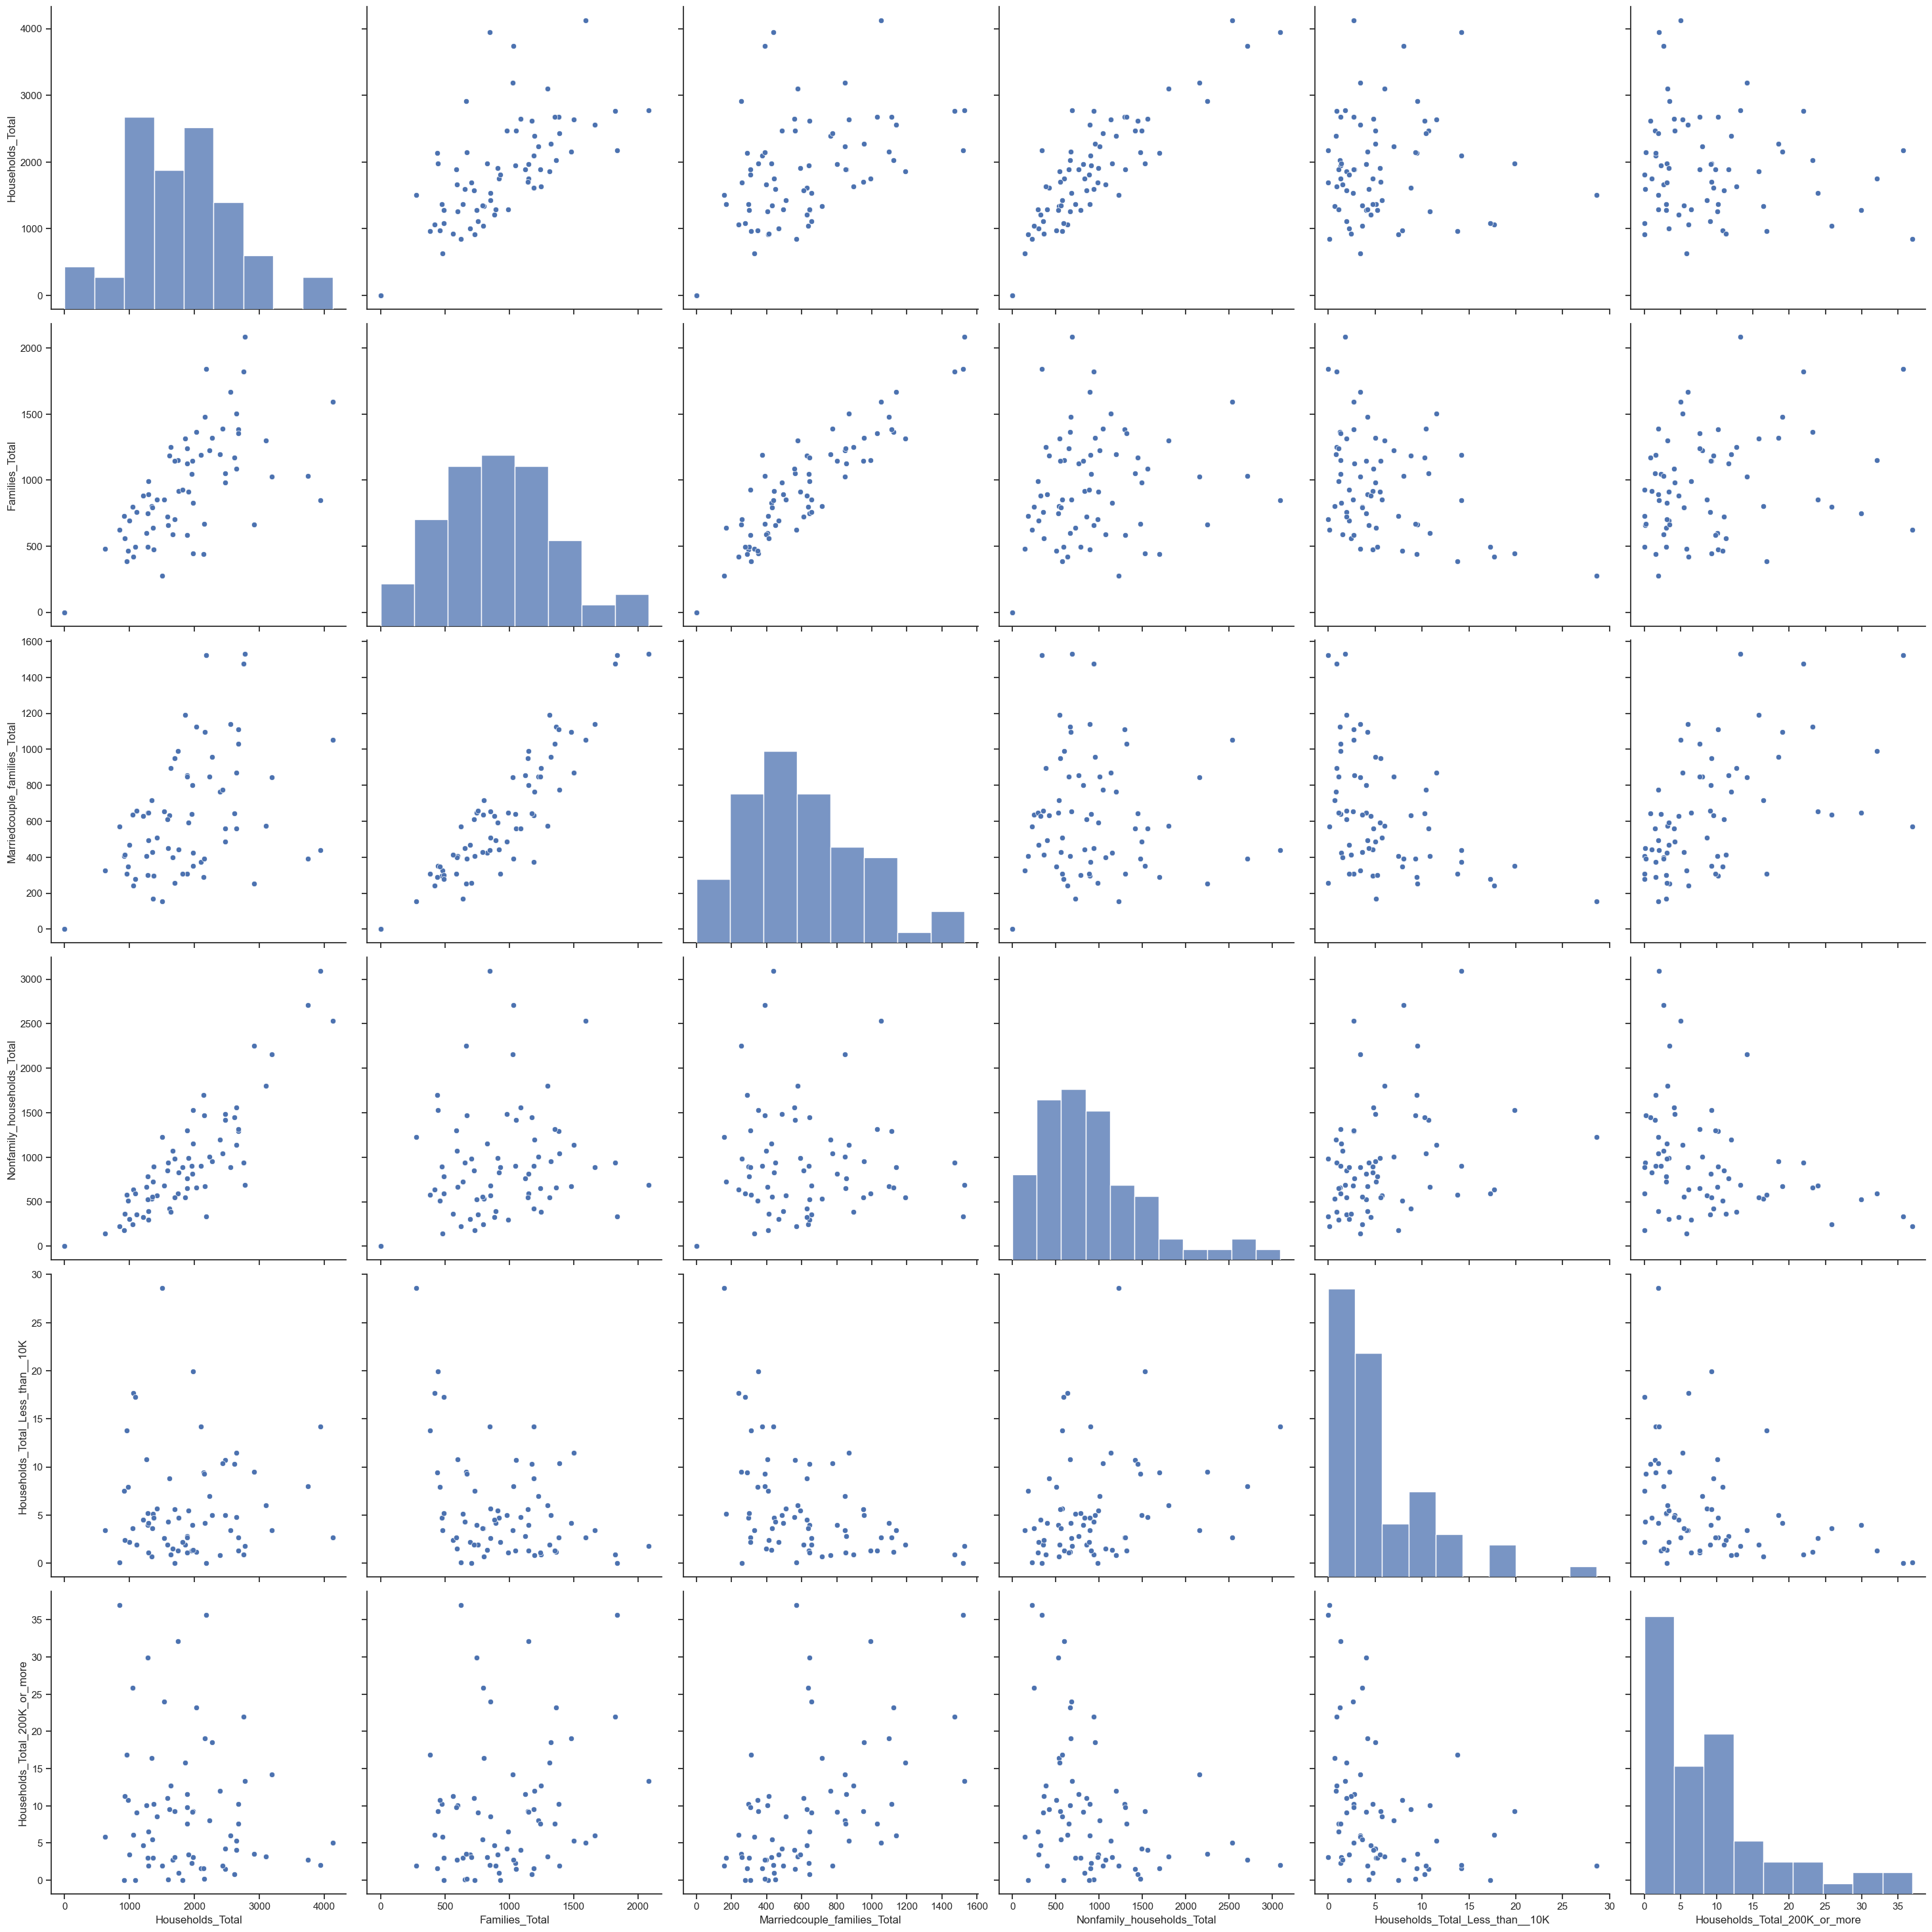

In [195]:
# To gain an idea of all the relationships between the variables do pairplor
sns.pairplot(income_clean[['Households_Total','Families_Total','Marriedcouple_families_Total','Nonfamily_households_Total','Households_Total_Less_than__10K','Households_Total_200K_or_more']],
            
            height=5);

In [196]:
# map to check it has worked

income_clean.explore('Households_Total', cmap='Dark2')


In [197]:
# check the CRS of both geo data frames, so we can accurately plot the layers on top of each other
print(income_clean.crs, b.crs)

EPSG:4326 EPSG:4326


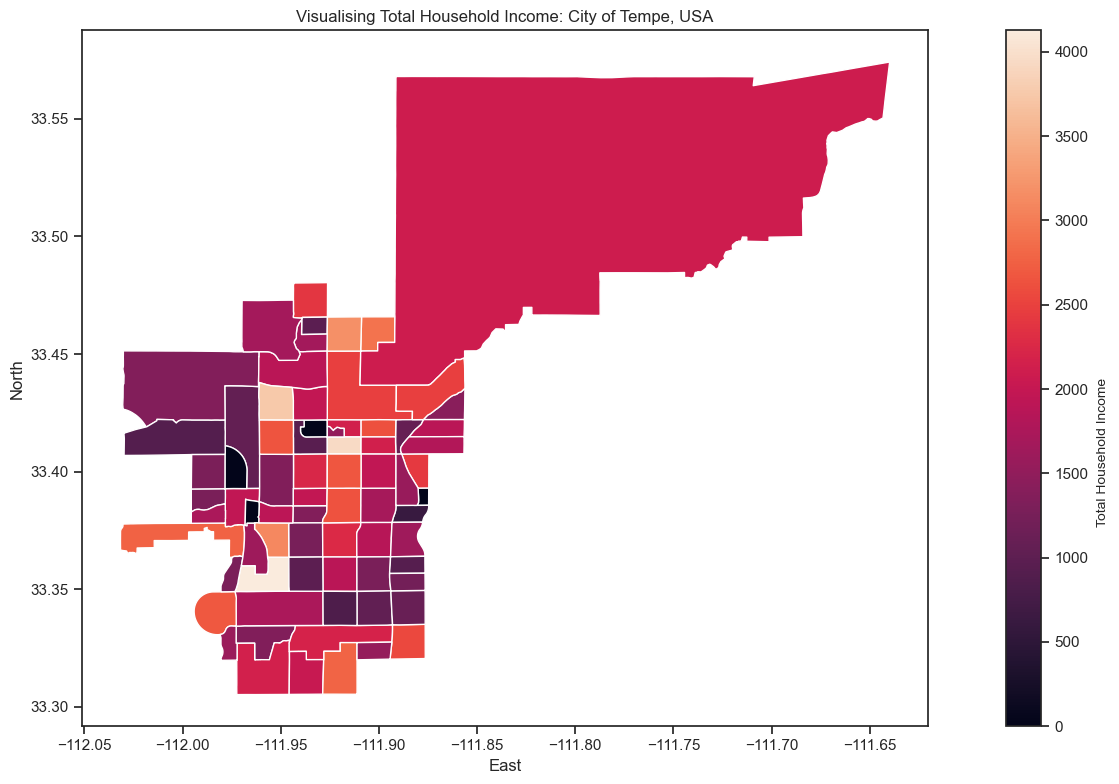

In [229]:
f,ax = plt.subplots(1, figsize=(16,8))
income_clean.plot(column='Households_Total',legend=True,ax=ax)

# Set the title
ax.set_title('Visualising Total Household Income: City of Tempe, USA')

# Set x-axis and y-axis labels
ax.set_xlabel('East')
ax.set_ylabel('North')

# Add a description along the existing colorbar
description = 'Total Household Income'

# Add the description
ax.text(1.2, 0.5, description, transform=ax.transAxes, fontsize=10, va='top', rotation='vertical')
# Show the plot
plt.tight_layout()

plt.show();

In [249]:
# import required package
from matplotlib.colors import ListedColormap
from matplotlib.colorbar import ColorbarBase

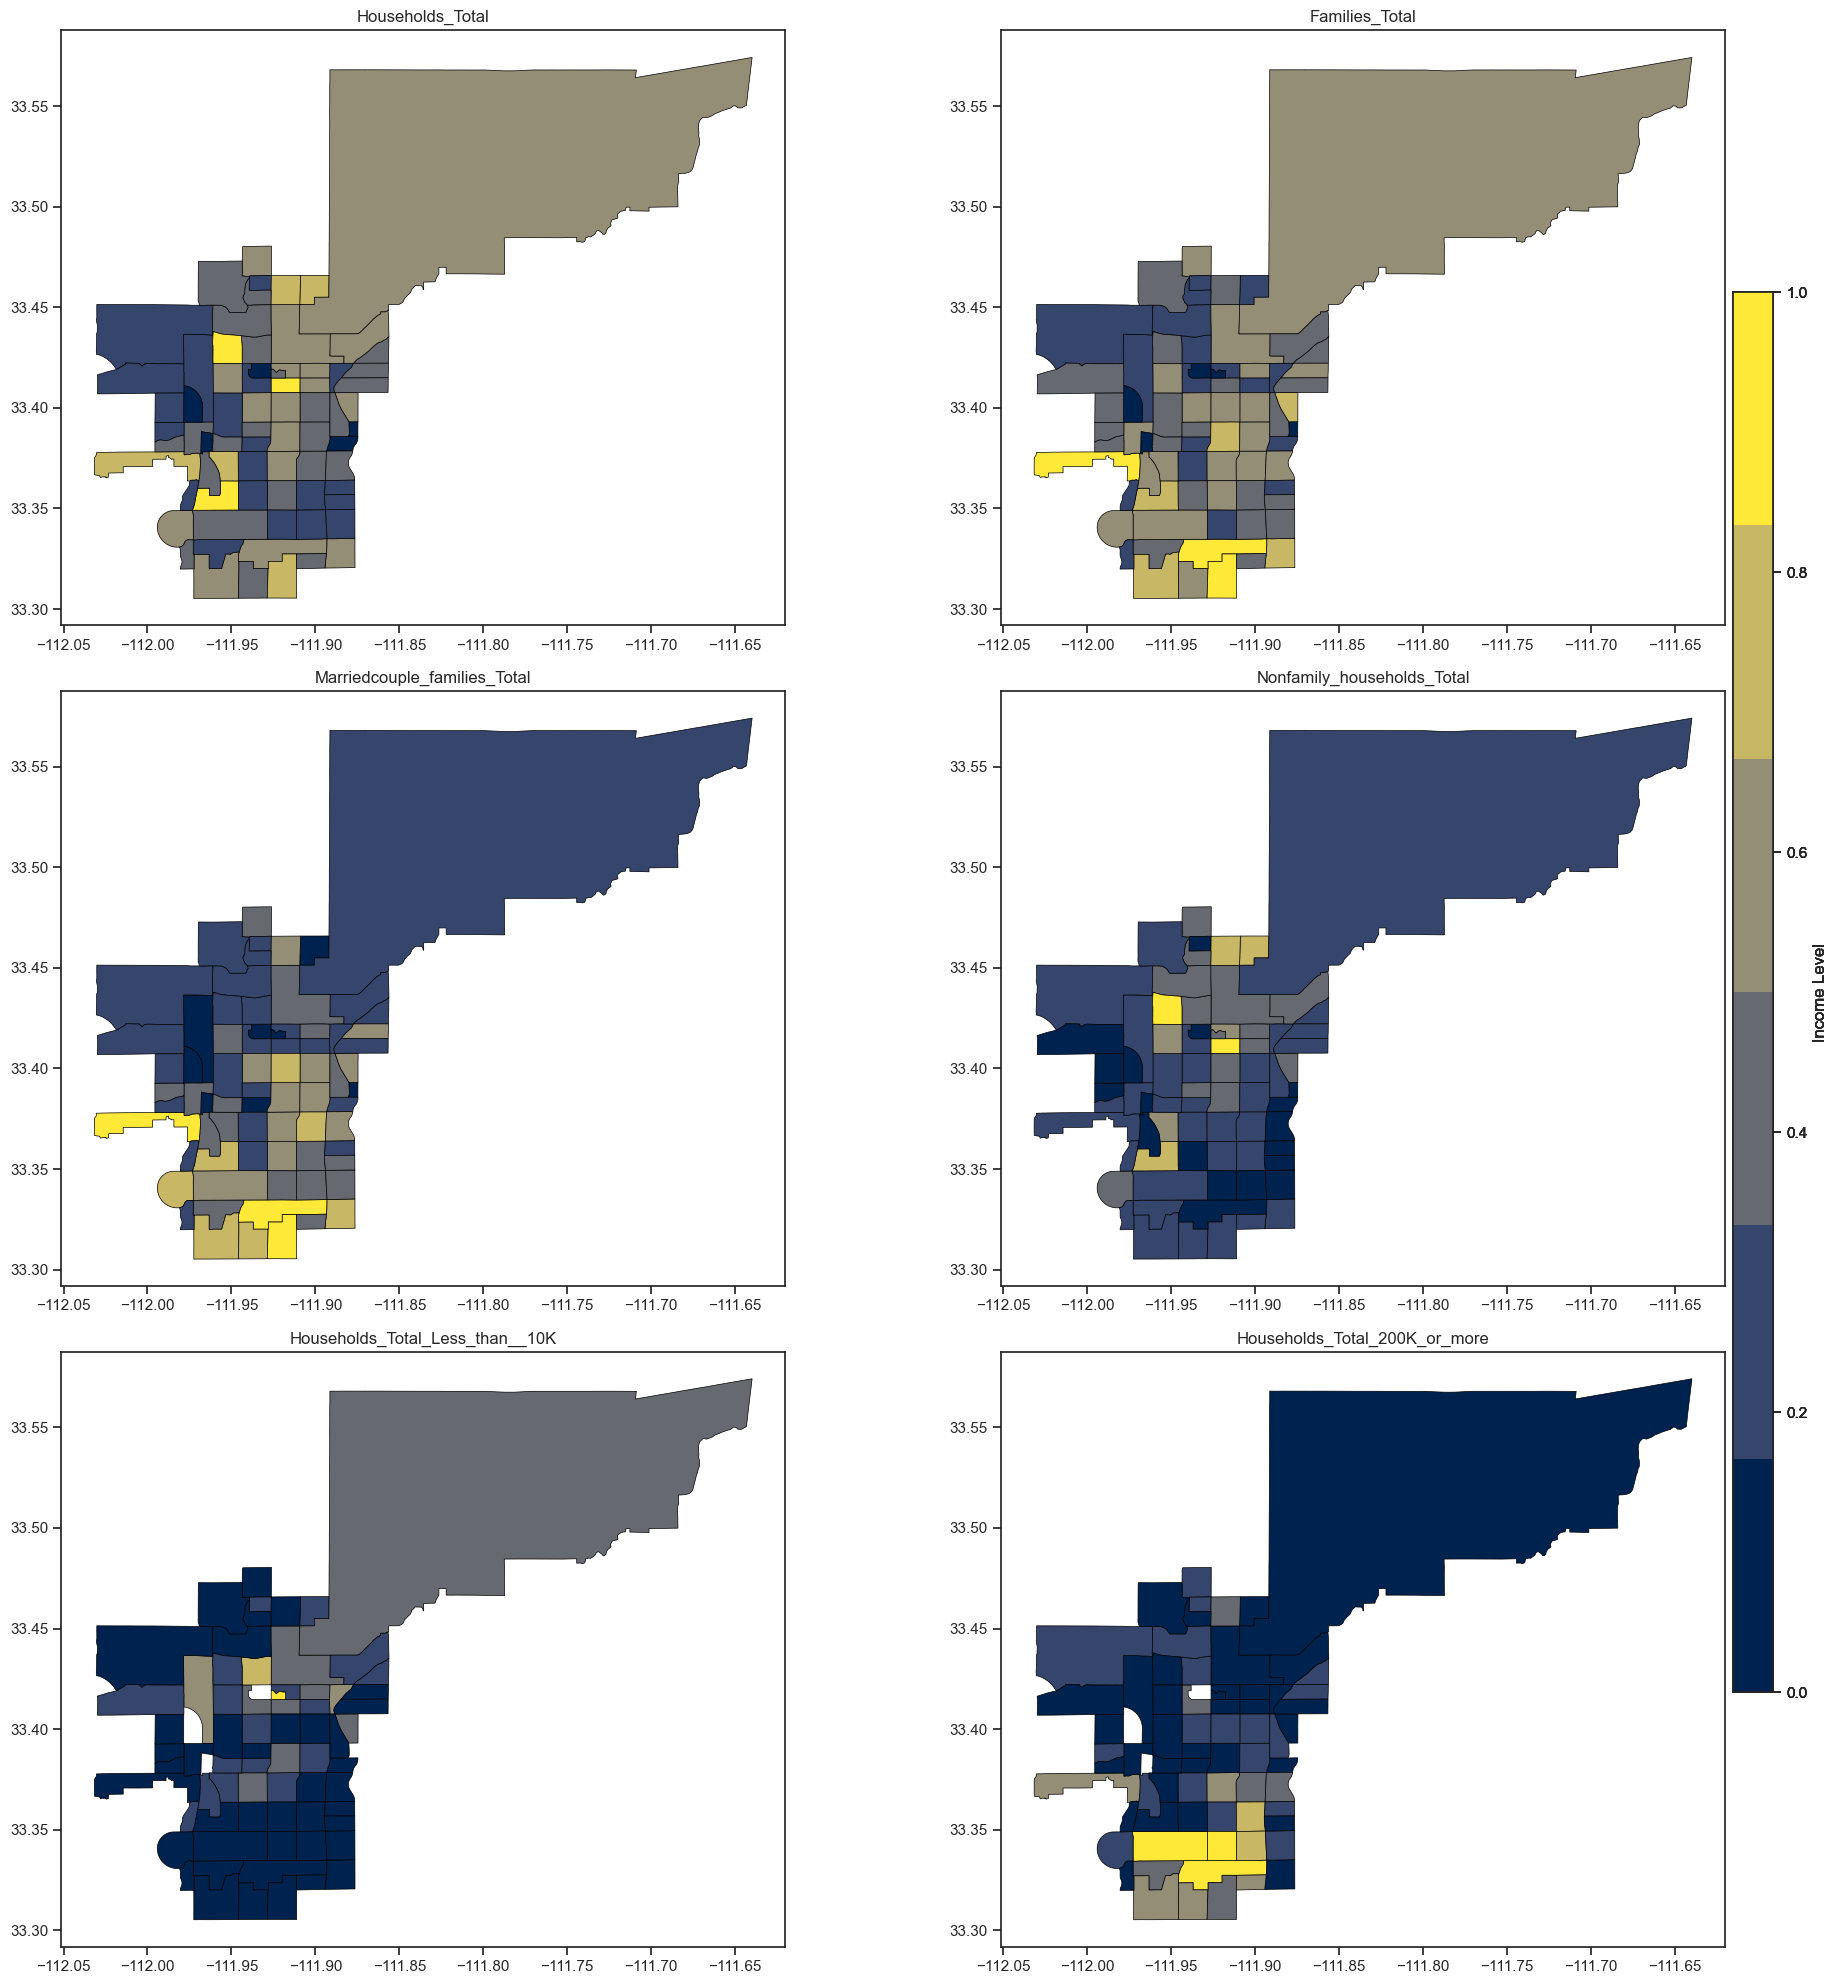

In [251]:
# Define the number of categories
num_categories = 6

# Create a colorblind-friendly colormap
cmap = plt.cm.cividis

# Get equally spaced colors from the colormap
colors = cmap(np.linspace(0, 1, num_categories))

# Create a ListedColormap
new_cmap = ListedColormap(colors)

# List of variables
variables = ['Households_Total', 'Families_Total','Marriedcouple_families_Total','Nonfamily_households_Total',
             'Households_Total_Less_than__10K','Households_Total_200K_or_more']

# Set up the figure and axes
fig, axes = plt.subplots(3,2, figsize=(20, 20))

# flatten the axes
axes = axes.flatten()

# loop through each variable and create a map
for i, variable in enumerate(variables):
    income_clean.plot(column=variable, cmap=new_cmap, ax=axes[i], legend=False, edgecolor='black', linewidth=0.5)
    axes[i].set_title(variable)
    
    # Add colorbar
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of the color bar
    sm = plt.cm.ScalarMappable(cmap=new_cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Income Level')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


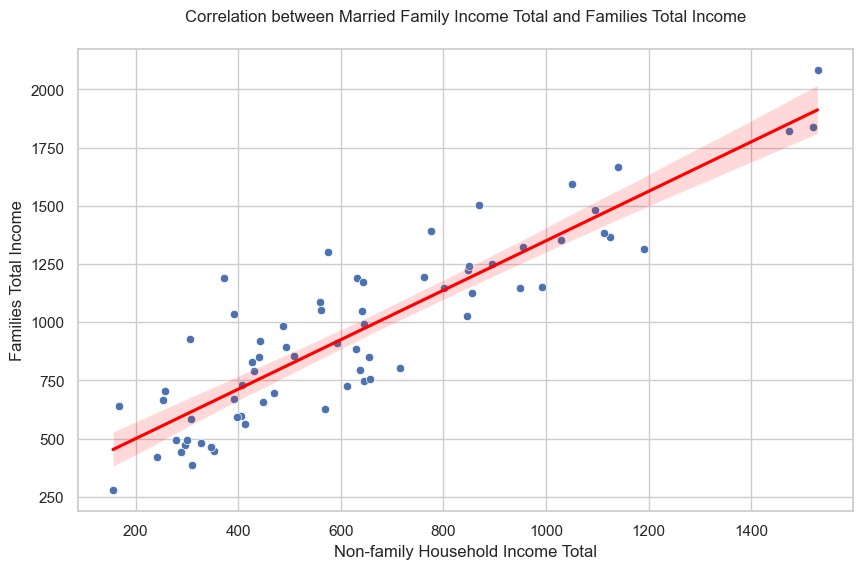

In [333]:
# ploting correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marriedcouple_families_Total', y='Families_Total', data=income_clean)
sns.regplot(x='Marriedcouple_families_Total', y='Families_Total', data=income_clean, scatter=False, color='red')
plt.title('Correlation between Married Family Income Total and Families Total Income', pad=20)
plt.xlabel('Non-family Household Income Total')
plt.ylabel('Families Total Income')

plt.show()

## K-means clustering

In [273]:
import geopandas as gpd
import folium
import pysal as ps
import libpysal
from libpysal import weights
from esda.getisord import G_Local
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

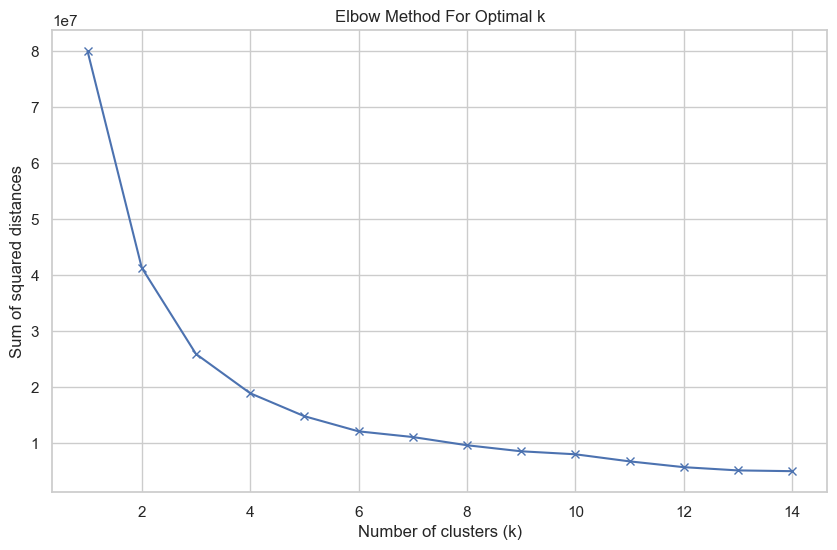

In [280]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

# Create an empty list to fill with values later
Sum_of_squared_distances = []

# Get a range of numbers from 1 to 15
K = range(1, 15)

# Define the variables of interest
variables_of_interest = [
    'Households_Total',
    'Families_Total',
    'Marriedcouple_families_Total',
    'Nonfamily_households_Total'
]

# Ensure there are no missing values in the variables of interest
income_clean = income_clean.dropna(subset=variables_of_interest)

# For each number in the range 1 to 15
for k in K:
    # Create a k-means model with that number of clusters
    # Set random state 
    km = cluster.KMeans(n_clusters=k, init="random", random_state=123)
    # Fit the model using the variables of interest
    km = km.fit(income_clean[variables_of_interest].values)
    # Calculate the sum of the squared distances and add this to the 'Sum_of_squared_distances' list
    Sum_of_squared_distances.append(km.inertia_)

# Plot the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [284]:
# Initialize KMeans with 5 clusters
km5 = cluster.KMeans(n_clusters=5, init="random", random_state=123)

# Select relevant columns for clustering
km5cls = km5.fit(income_clean[['Households_Total', 'Families_Total', 'Marriedcouple_families_Total', 
                    'Nonfamily_households_Total', 'Shape__Area', 'Shape__Length']].values)

In [285]:
km5cls.labels_

array([4, 0, 4, 0, 4, 4, 0, 0, 4, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 0, 2, 4, 4, 2, 4, 2, 0, 4, 4, 2, 2, 2, 4, 4, 2, 4, 3, 4,
       2, 4, 0, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 4, 2, 4, 4, 2,
       4, 0, 4])

In [286]:
income_clean['Cluster'] = km5cls.labels_
income_clean['Cluster'].head()

0    4
1    0
2    4
3    0
4    4
Name: Cluster, dtype: int32

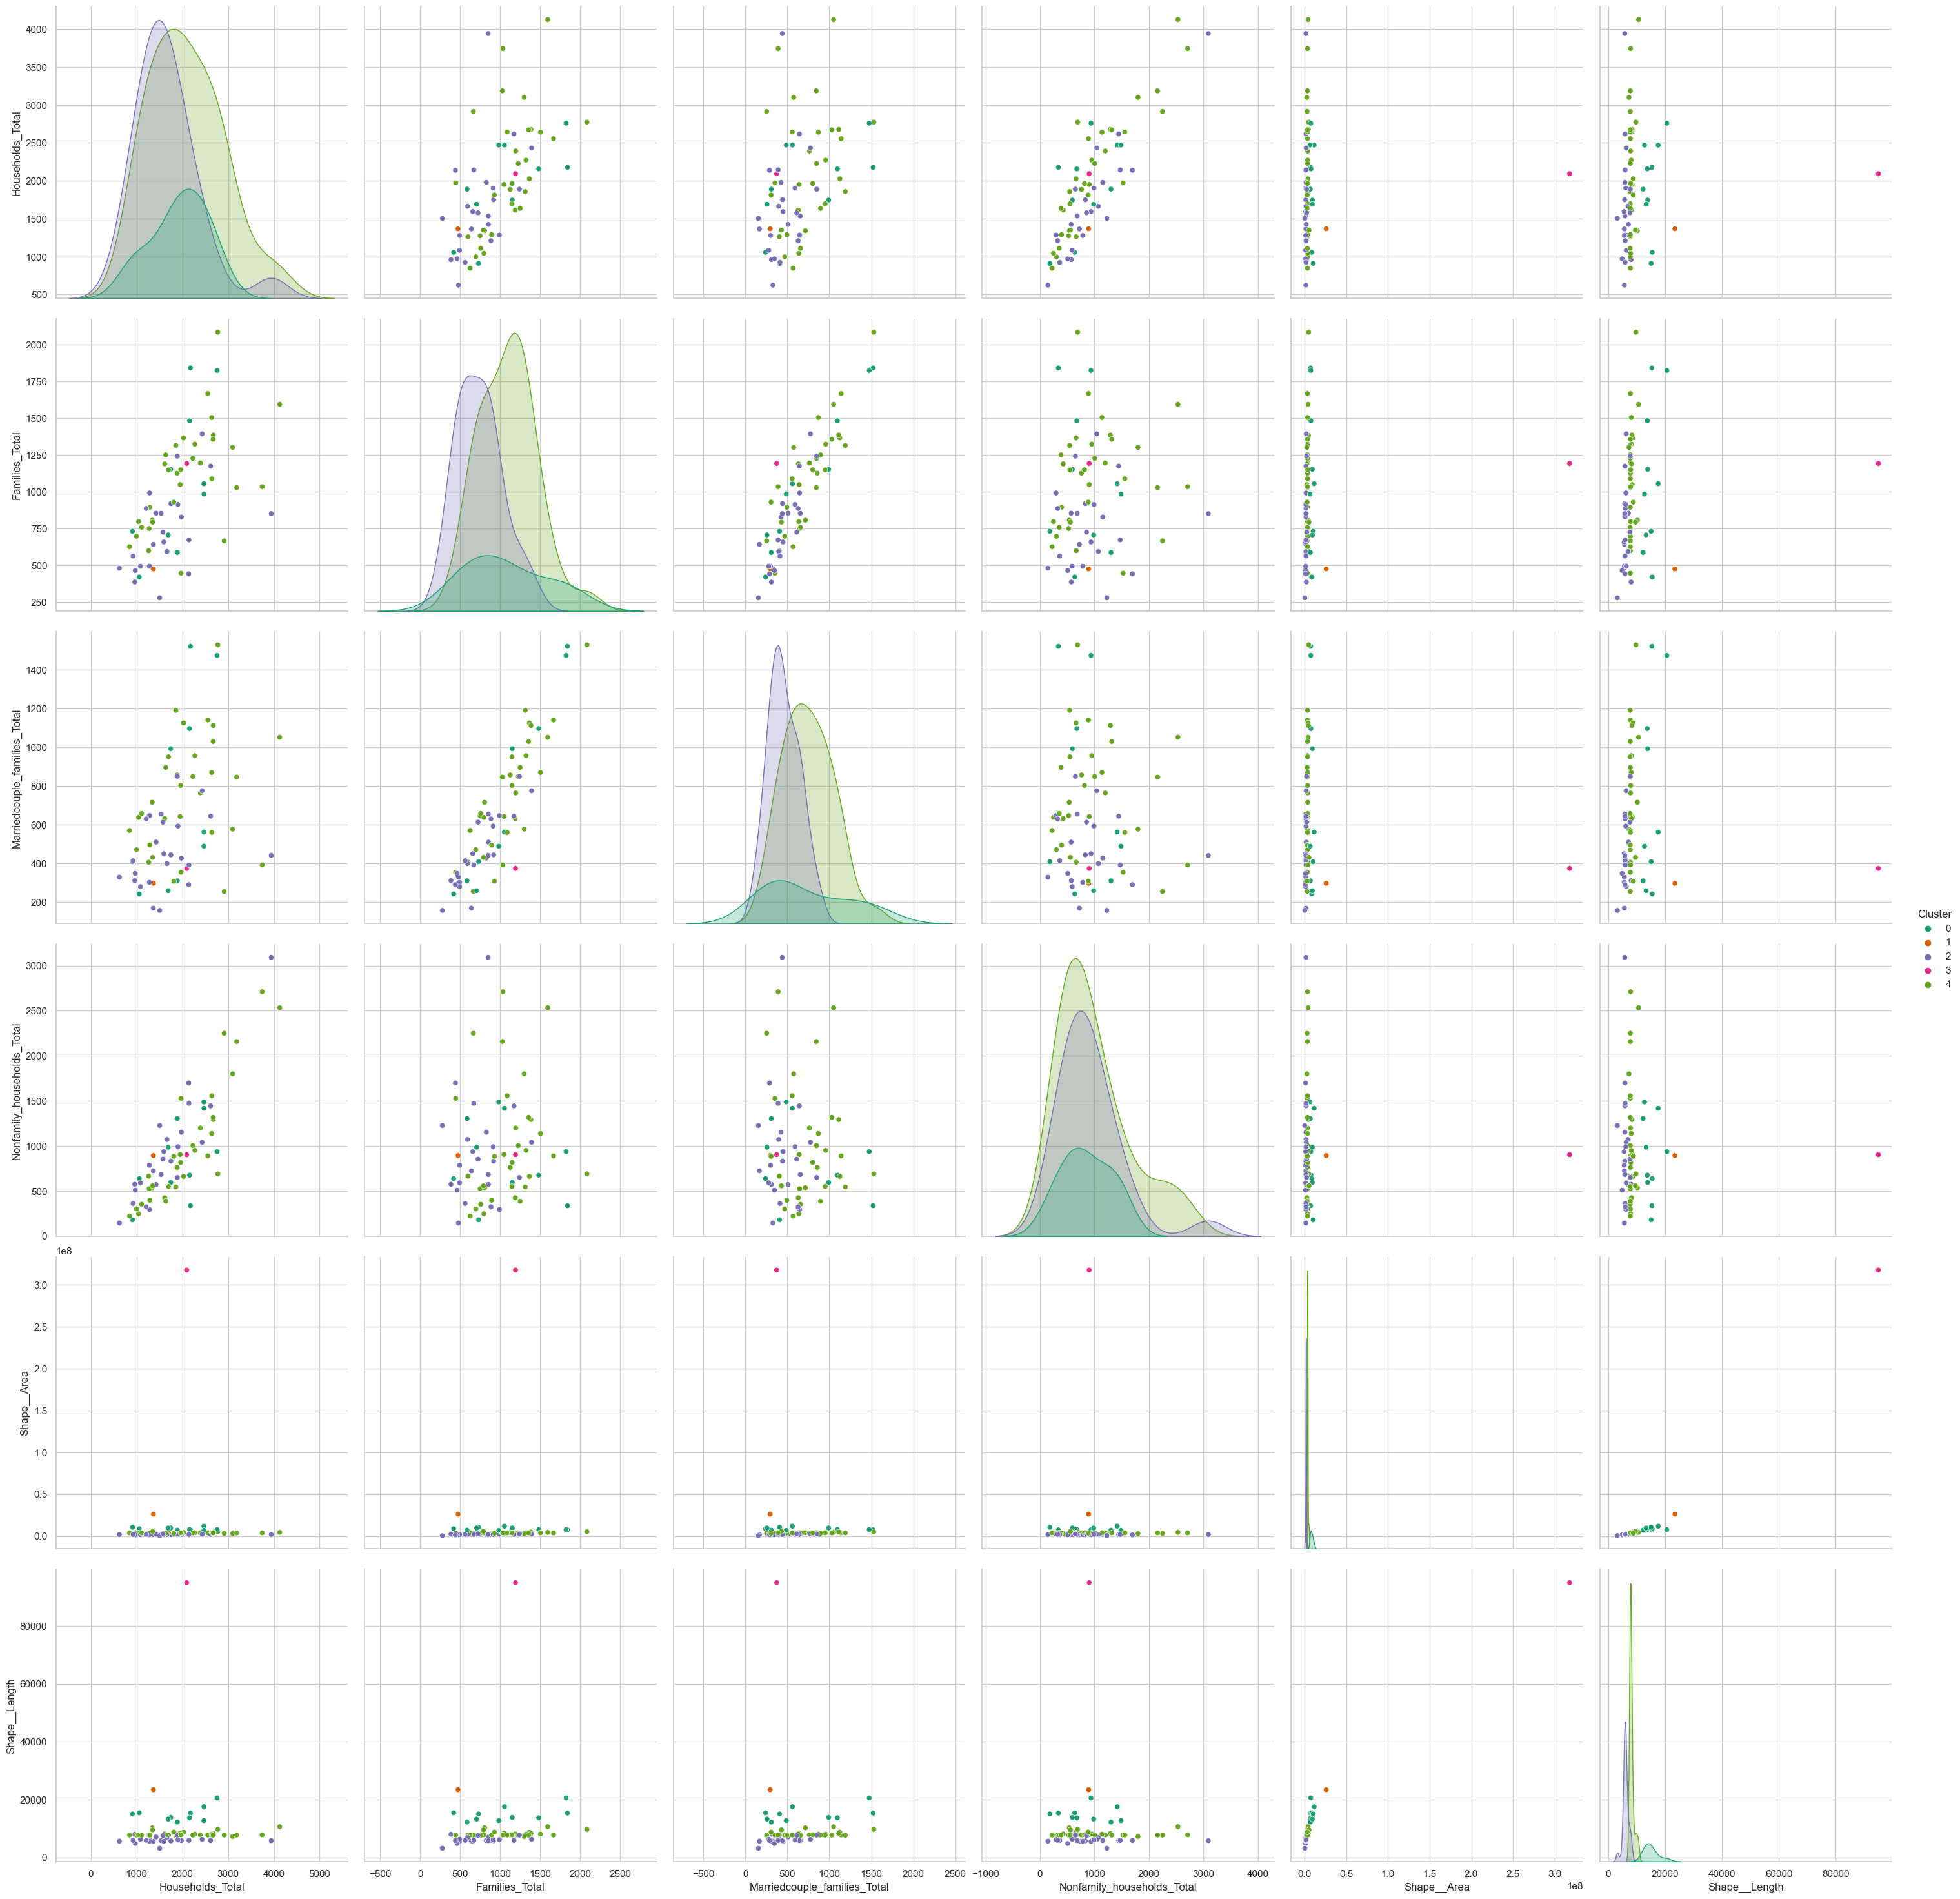

In [293]:
# The pari plot gives us an idea of all the relationships between the domains captured by the clustering
sns.pairplot(income_clean[['Households_Total', 'Families_Total', 'Marriedcouple_families_Total', 
                    'Nonfamily_households_Total', 'Shape__Area', 'Shape__Length','Cluster']],
             hue='Cluster',
             palette='Dark2',
            height=5)

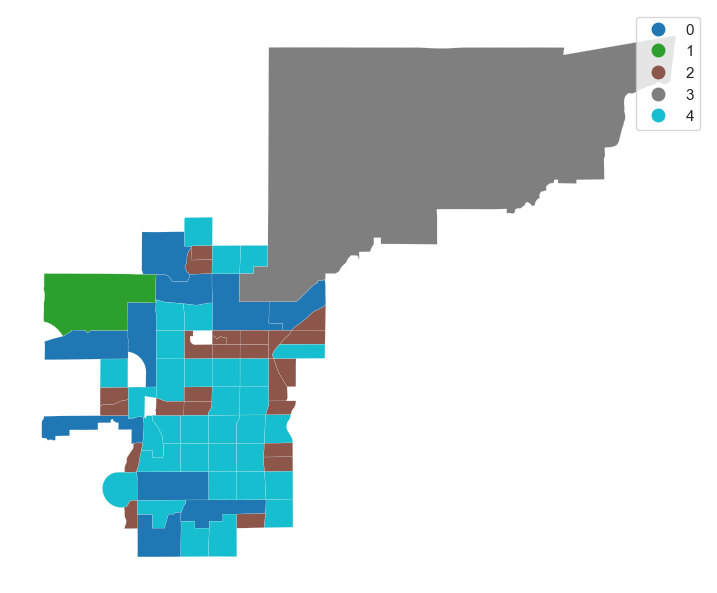

In [294]:
# We can also see that there is a spatial pattern to the clusters when we map them
f, ax = plt.subplots(1, figsize=(9, 9))

income_clean.plot(column='Cluster', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

------------

In [334]:
import nbformat

def count_words_in_markdown_cells(notebook_path):
    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)

    markdown_word_count = 0

    # Iterate through the cells in the notebook
    for cell in notebook['cells']:
        if cell['cell_type'] == 'markdown':
            # Count words in markdown cells
            markdown_text = cell['source']
            markdown_word_count += len(markdown_text.split())

    return markdown_word_count

# Specify the path to your notebook
notebook_path = "D:/sem2/Sem2/Programming_for_gis/100/100.ipynb"

# Get word count in markdown cells
markdown_word_count = count_words_in_markdown_cells(notebook_path)

print(f'Markdown cells word count: {markdown_word_count}')

Markdown cells word count: 60
